In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
battery_data = pd.read_csv("battery-data.csv",header = None)
battery_data.columns = ["charging_time","working_time"]
battery_data.head()

,charging_time,working_time
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


In [21]:
charging_times = np.array(battery_data[battery_data.columns[0]]).reshape(battery_data.shape[0], 1)
working_times = np.array(battery_data[battery_data.columns[1]]).reshape(battery_data.shape[0], 1)

x_train = charging_times[:-30]
x_test = charging_times[-30:]

y_train = working_times[:-30]
y_test = working_times[-30:]

Making a scatter plot only on the charging and working times on the train data

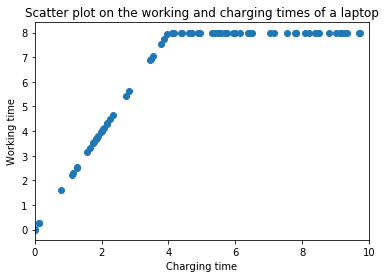

In [33]:
plt.scatter(x_train,y_train)
plt.title("Scatter plot on the working and charging times of a laptop")
plt.xlabel("Charging time")
plt.xlim(0,10)
plt.ylabel("Working time")
plt.show()

In [49]:
def makeLinearRegression(x_train,y_train, x_test,y_test):
    """
    Does a linear regression.
    """
    linear_regression = linear_model.LinearRegression()
    linear_regression.fit(x_train, y_train)

    y_pred = linear_regression.predict(x_test)

    print("Coefficients :",linear_regression.coef_)
    print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
    print("R2 score :",r2_score(y_test,y_pred))

    plt.title("Scatter plot of the predicted times and the real ones")
    plt.xlabel("Charging time")
    plt.ylabel("Working time")
    plt.scatter(x_test,y_test,color="blue",label="Real data times")
    plt.plot(x_test,y_pred,color="red",label="Predicted times")
    plt.legend()
    plt.show()

Coefficients : [[0.06886655]]
Mean Squared Error : 3.963069879288434
R2 score : 0.1636972722949187


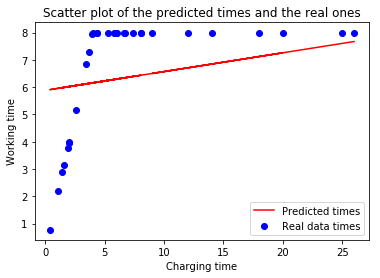

In [50]:
makeLinearRegression(x_train,y_train,x_test,y_test)

We will remove all charges times above 20 hours because for so many time we will for sure get the maximal charging capacity of a normal laptop battery. We will see if that thing will make our mean squarred error smaller.

In [57]:
new_data = battery_data
new_data.charging_time = battery_data[battery_data.charging_time <= 20]
new_data.shape
new_data = new_data.dropna()

new_charging_times = np.array(new_data[new_data.columns[0]]).reshape(new_data.shape[0], 1)
new_working_times = np.array(new_data[new_data.columns[1]]).reshape(new_data.shape[0], 1)

new_x_train = new_charging_times[:-30]
new_x_test = new_charging_times[-30:]

new_y_train = new_working_times[:-30]
new_y_test = new_working_times[-30:]

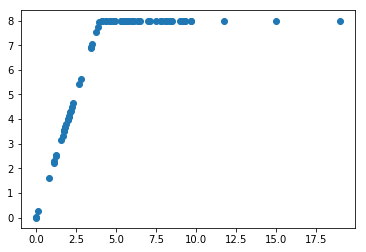

In [58]:
plt.scatter(new_x_train,new_y_train)
plt.show()

Coefficients : [[0.5053129]]
Mean Squared Error : 3.3959446226050005
R2 score : 0.4450790395170845


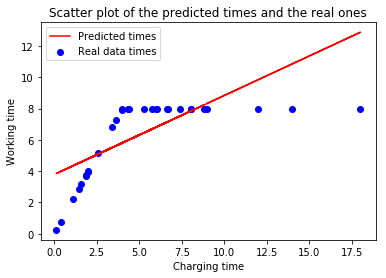

In [59]:
makeLinearRegression(new_x_train,new_y_train,new_x_test,new_y_test)

__Maybe that means that when we filter our data to remove the charging times above 20 hours we make the Mean Squarred Error smaller (It was 3.96, now it is 3.4).__